In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:

df = pd.read_csv("weatherAUS_rainfall_prediction_dataset_cleaned.csv")


print("Dataset shape:", data.shape)
print(data.head())


Dataset shape: (145460, 23)
         Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2010-04-30  Adelaide     10.8     21.2       0.0          1.8      6.60   
1  2014-07-22  Adelaide      3.7     19.0       0.0          1.4      7.61   
2  2014-07-23  Adelaide      9.6     15.8       0.0          2.6      7.61   
3  2014-07-24  Adelaide     10.1     15.5      16.6          0.8      7.61   
4  2014-07-25  Adelaide     11.2     16.2       1.8          0.6      7.61   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0         ENE           22.0        ENE  ...        66.0         48.0   
1           N           24.0          N  ...        75.0         32.0   
2          NE           52.0        NNE  ...        35.0         51.0   
3         NNE           50.0         NW  ...        96.0         80.0   
4          NW           30.0        WNW  ...        89.0         70.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3p

In [ ]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [ ]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        145460 non-null  float64
 3   MaxTemp        145460 non-null  float64
 4   Rainfall       145460 non-null  float64
 5   Evaporation    145460 non-null  float64
 6   Sunshine       145460 non-null  float64
 7   WindGustDir    145460 non-null  object 
 8   WindGustSpeed  145460 non-null  float64
 9   WindDir9am     145460 non-null  object 
 10  WindDir3pm     145460 non-null  object 
 11  WindSpeed9am   145460 non-null  float64
 12  WindSpeed3pm   145460 non-null  float64
 13  Humidity9am    145460 non-null  float64
 14  Humidity3pm    145460 non-null  float64
 15  Pressure9am    145460 non-null  float64
 16  Pressure3pm    145460 non-null  float64
 17  Cloud9am       145460 non-nul

In [ ]:
df.describe()

MinTemp        MaxTemp       Rainfall    Evaporation  \
count  145460.000000  145460.000000  145460.000000  145460.000000   
mean       12.193993      23.221337       2.360898       5.468995   
std         6.365750       7.088124       8.382488       3.161541   
min        -8.500000      -4.800000       0.000000       0.000000   
25%         7.700000      18.000000       0.000000       4.000000   
50%        12.100000      22.700000       0.000000       5.470000   
75%        16.800000      28.200000       1.000000       5.470000   
max        33.900000      48.100000     371.000000     145.000000   

            Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  145460.000000  145460.000000  145460.000000  145460.000000   
mean        7.610612      40.035567      14.043384      18.662601   
std         2.729486      13.118253       8.861059       8.716581   
min         0.000000       6.000000       0.000000       0.000000   
25%         7.610000      31.000000       7.000000      13.000000   
50%         7.610000      39.000000      13.000000      18.660000   
75%         8.700000      46.000000      19.000000      24.000000   
max        14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm    Pressure9am    Pressure3pm  \
count  145460.000000  145460.000000  145460.000000  145460.000000   
mean       68.880816      51.539143    1017.649946    1015.256314   
std        18.854765      20.471189       6.728467       6.663973   
min         0.000000       0.000000     980.500000     977.100000   
25%        57.000000      37.000000    1013.500000    1011.100000   
50%        69.000000      51.540000    1017.650000    1015.260000   
75%        83.000000      65.000000    1021.800000    1019.400000   
max       100.000000     100.000000    1041.000000    1039.600000   

            Cloud9am       Cloud3pm        Temp9am        Temp3pm  
count  145460.000000  145460.000000  145460.000000  145460.000000  
mean        4.448437       4.509959      16.990624      21.683306  
std         2.265605       2.092954       6.449221       6.850057  
min         0.000000       0.000000      -7.200000      -5.400000  
25%         3.000000       4.000000      12.300000      16.700000  
50%         4.450000       4.510000      16.800000      21.400000  
75%         6.000000       6.000000      21.500000      26.200000  
max         9.000000       9.000000      40.200000      46.700000

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:

df = data.copy()
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['float64']).columns

# Label encode categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

X = df.drop("RainTomorrow", axis=1)
y = df["RainTomorrow"]

# Scale numerical features
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (116368, 22)
Testing set shape: (29092, 22)


In [ ]:
features = ["MinTemp", "MaxTemp", "Rainfall", "Humidity3pm", "Pressure3pm", "WindSpeed3pm"]
target = "RainTomorrow"

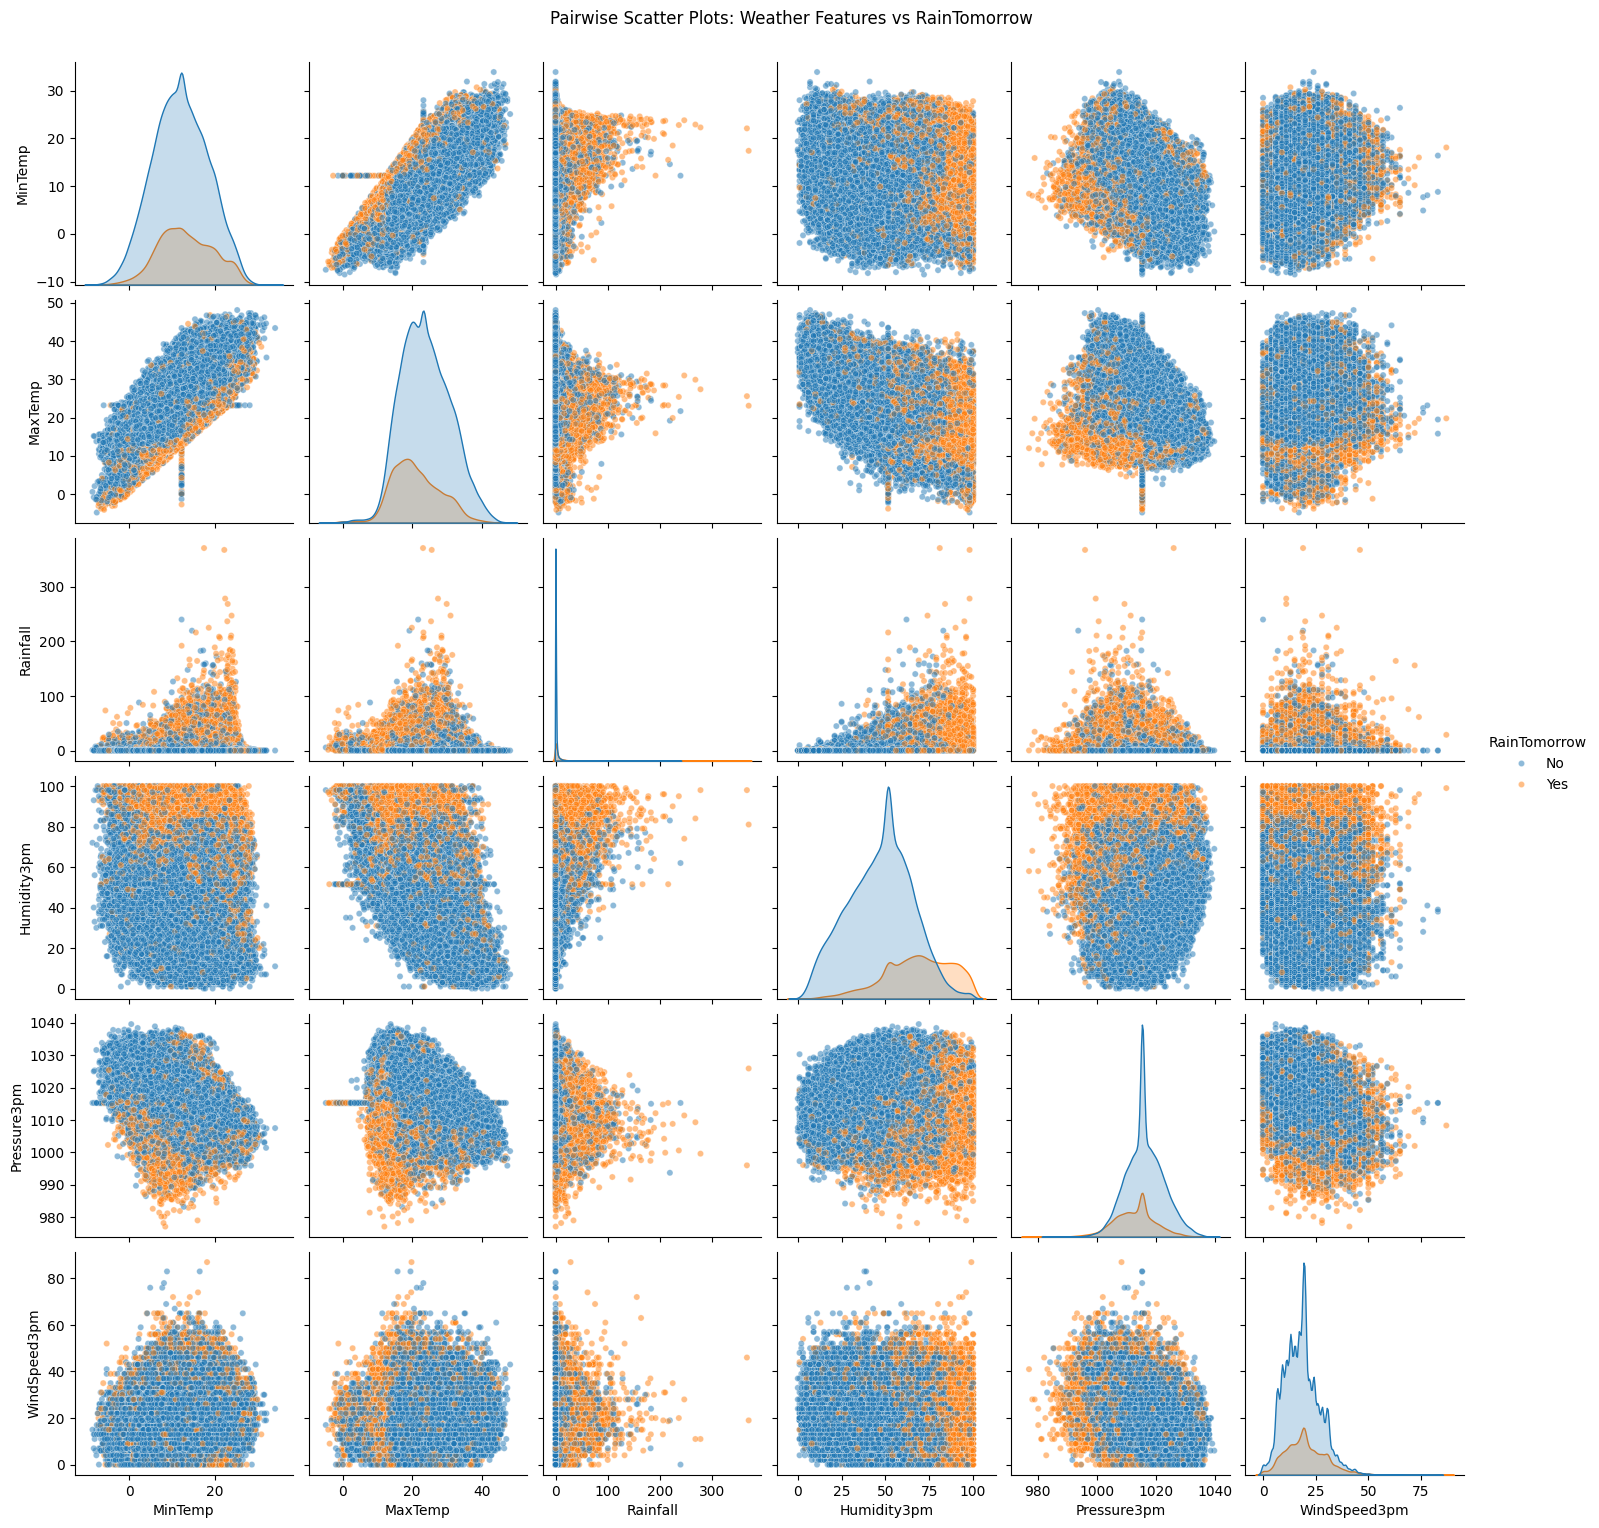

In [ ]:
# Create pairplot to compare all selected features with the target variable
sns.pairplot(df[features + [target]], hue=target, plot_kws={'alpha':0.5, 's':20})
plt.suptitle("Pairwise Scatter Plots: Weather Features vs RainTomorrow", y=1.02)
plt.show()

In [ ]:

models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', random_state=42)
}


In [ ]:

results = {}


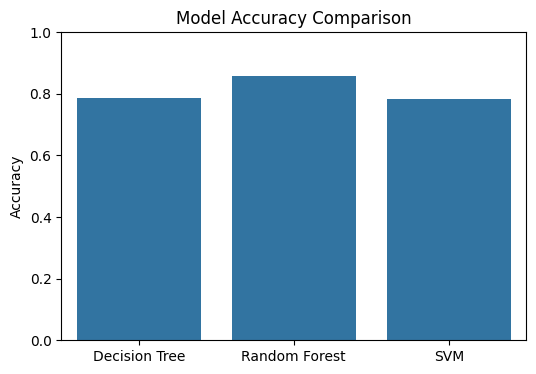

In [ ]:

plt.figure(figsize=(6,4))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()


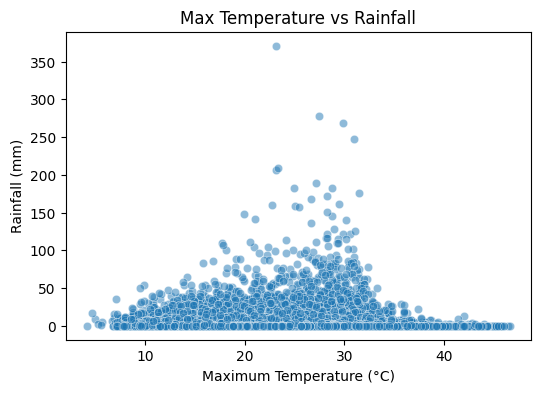

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset
df = pd.read_csv("weatherAUS_rainfall_prediction_dataset_cleaned.csv")

plt.figure(figsize=(6,4))
sns.scatterplot(x="MaxTemp", y="Rainfall", data=df, alpha=0.5)
plt.title("Max Temperature vs Rainfall")
plt.xlabel("Maximum Temperature (°C)")
plt.ylabel("Rainfall (mm)")
plt.show()

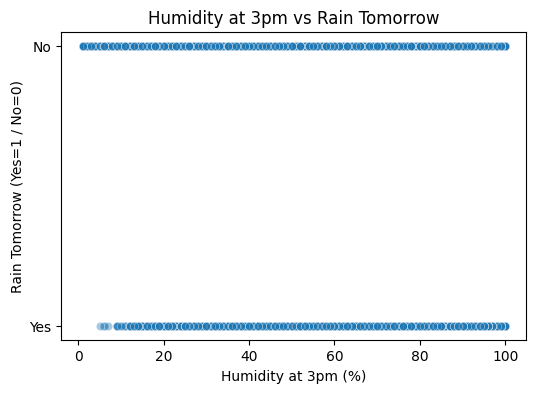

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset
df = pd.read_csv("weatherAUS_rainfall_prediction_dataset_cleaned.csv")

plt.figure(figsize=(6,4))
sns.scatterplot(x="Humidity3pm", y="RainTomorrow", data=df, alpha=0.4)
plt.title("Humidity at 3pm vs Rain Tomorrow")
plt.xlabel("Humidity at 3pm (%)")
plt.ylabel("Rain Tomorrow (Yes=1 / No=0)")
plt.show()

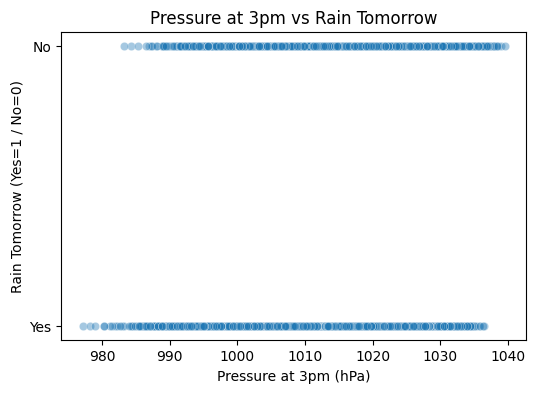

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset
df = pd.read_csv("weatherAUS_rainfall_prediction_dataset_cleaned.csv")

plt.figure(figsize=(6,4))
sns.scatterplot(x="Pressure3pm", y="RainTomorrow", data=df, alpha=0.4)
plt.title("Pressure at 3pm vs Rain Tomorrow")
plt.xlabel("Pressure at 3pm (hPa)")
plt.ylabel("Rain Tomorrow (Yes=1 / No=0)")
plt.show()

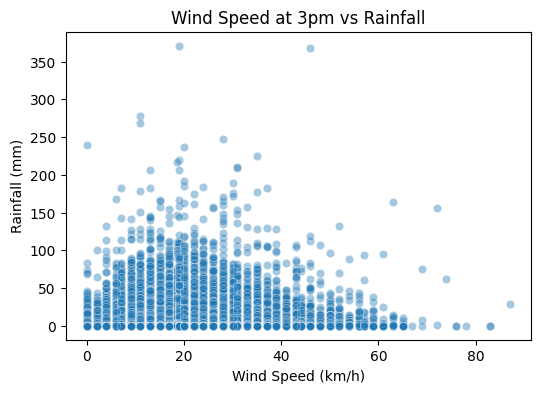

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset
df = pd.read_csv("weatherAUS_rainfall_prediction_dataset_cleaned.csv")

plt.figure(figsize=(6,4))
sns.scatterplot(x="WindSpeed3pm", y="Rainfall", data=df, alpha=0.4)
plt.title("Wind Speed at 3pm vs Rainfall")
plt.xlabel("Wind Speed (km/h)")
plt.ylabel("Rainfall (mm)")
plt.show()

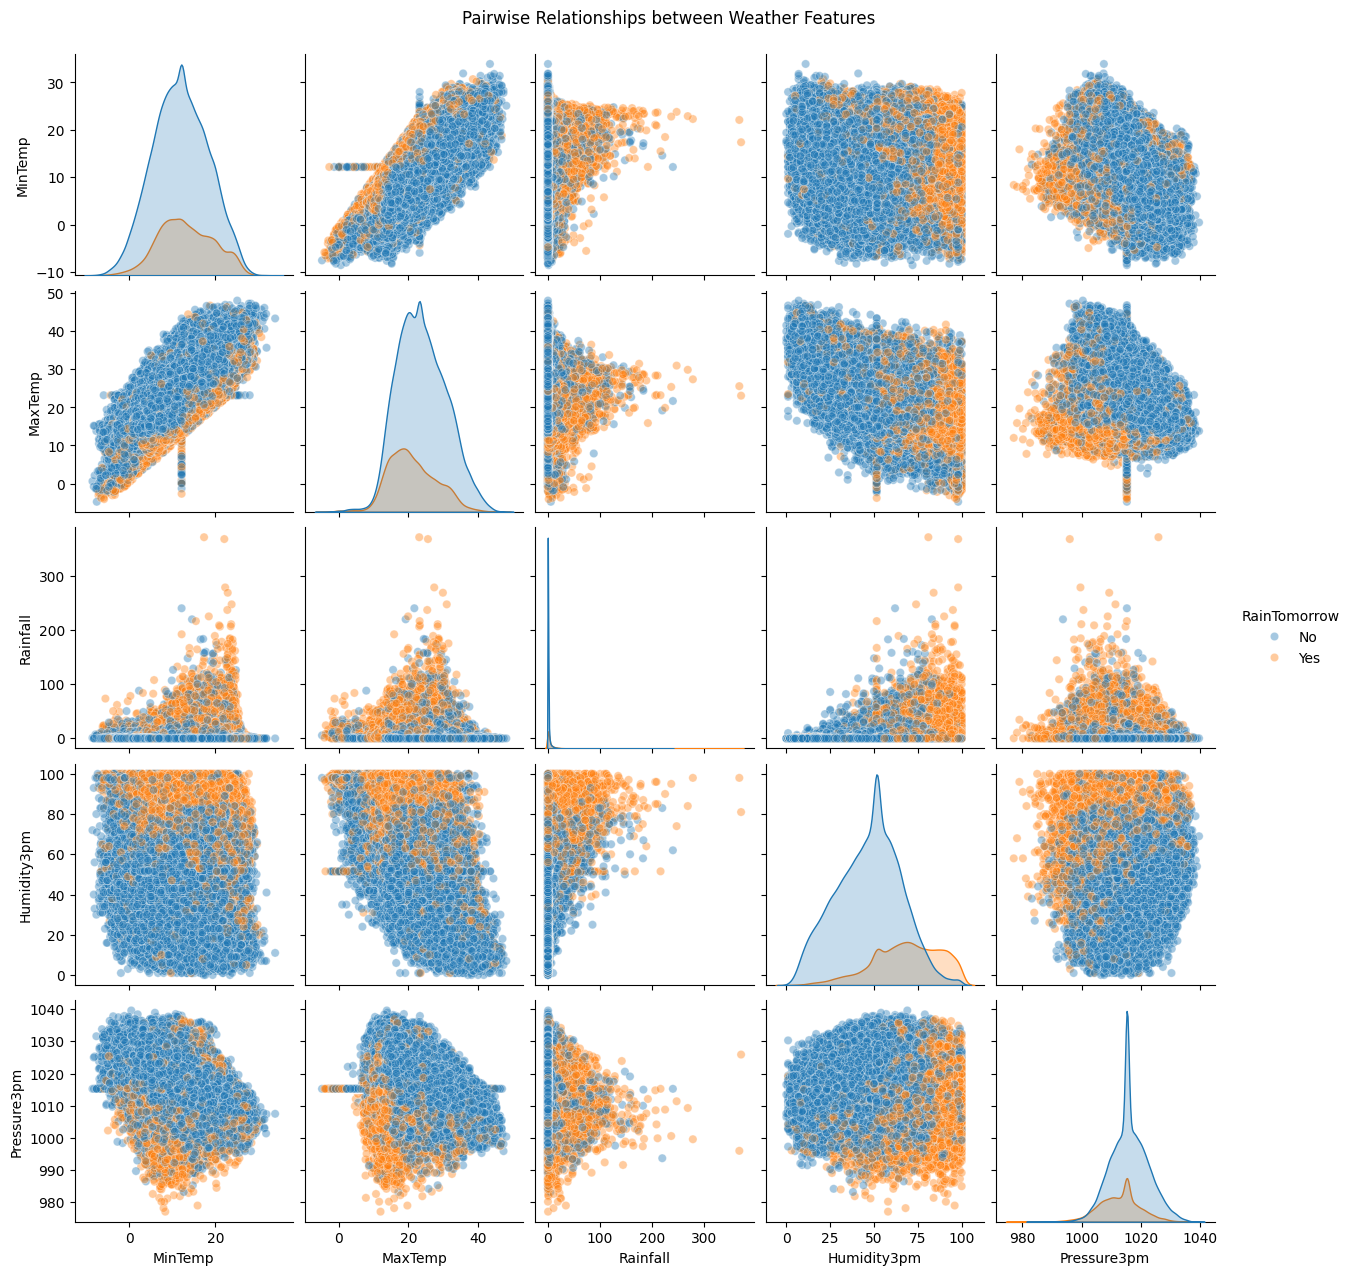

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

selected_features = ["MinTemp", "MaxTemp", "Rainfall", "Humidity3pm", "Pressure3pm", "RainTomorrow"]
sns.pairplot(df[selected_features], hue="RainTomorrow", plot_kws={'alpha':0.4})
plt.suptitle("Pairwise Relationships between Weather Features", y=1.02)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

models = {
    "Decision Tree": y_pred_dt,
    "Random Forest": y_pred_rf,
    "SVM": y_pred_svm
}

for name, y_pred in models.items():
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


NameError: name 'y_pred_dt' is not defined

In [ ]:

for model_name, acc in results.items():
    print(f"{model_name}: {round(acc * 100, 2)}%")

Decision Tree: 78.74%
Random Forest: 85.72%
SVM: 78.34%


In [ ]:

best_model_name = max(results, key=results.get)
best_model = models[best_model_name]


In [ ]:

sample = X_test.iloc[[0]]
prediction = best_model.predict(sample)[0]
print(f"\nUsing {best_model_name}, prediction for sample record:",
      "🌧️ Rain Tomorrow" if prediction == 1 else " No Rain Tomorrow")



Using Random Forest, prediction for sample record: ☀️ No Rain Tomorrow


In [ ]:
import joblib

joblib.dump(best_model, f"best_model_{best_model_name.replace(' ', '_').lower()}.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(label_encoders, "label_encoders.pkl")

print(f"\n✅ Best model ({best_model_name}) saved successfully!")



✅ Best model (Random Forest) saved successfully!
